**INTRODUCTION** 

* Question: 

What variables are indicators of the best quality red wine, and how do these factors affect the quality of the wine?

* Background Information: 

Red wine has always been popular in social settings, though it is typically expensive as a luxury good, and the price is heavily based on the wine's quality. Product quality certification is a marketing tool used by red wine vendors to justify their pricing. However, the procedure for wine quality is impossible to evaluate objectively because it often only considers the subjective sensory perceptions of human specialists. Moreover, prices differ in ways that are unfair to consumers as a result of the highly variable quality assessment. However, laboratory-based physicochemical testing that takes into account chemical properties is yet another crucial component of wine certification. ((Nemzer et al. 2021) If sensory evaluations can be coupled with scientific characterization outcomes, there can be greater control over the quality evaluation procedure and better results capturing the inherent subjectivity.

* Dataset: 

The red wine quality dataset that will be used is related to red variants of the Portuguese "Vinho Verde" wine. This dataset contains a total of 12 variables including physicochemical (inputs) and sensory (output) variables, with 1,599 recorded observations. The input variables are based on the chemical component analysis of red wine, including measurements such as acidity, residual sugar, density, pH, alcohol, sulfur dioxide, and chlorides. The quality of the red wine is represented with a score between 0 to 10 based on the sensory output. 


**METHODS**

The quality of a given observation of red wine will be classified with 5 predictors: fixed acidity, residual sugar, density, pH, and alcohol. First, the parameter will be standarized to make values consistent. The relationships between various predictors and the quality of the red wine will be visualized using scatterplots. Then, the k value with the highest accuracy will be calculated. Based on the calculated value, the wine quality will be trained using the chosen parameters so that wine quality can be determined using fixed acidity, residual sugar, density, pH, and alcohol. 


In [ ]:
install.packages("GGally")
library(repr)
library(readr)
library(GGally)
library(ggplot2)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::

1. Demonstrate that the dataset can be read from the web into R.

In [ ]:
web_data <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
redwine_data <- read_delim(web_data) |>
    rename(fixed_acidity = `fixed acidity`, 
          volatile_acidity = `volatile acidity`,
          citric_acid = `citric acid`,
          residual_sugar = `residual sugar`,
          free_sulfur_dioxide = `free sulfur dioxide`,
          total_sulfur_dioxide = `total sulfur dioxide`) |>
    mutate(quality = as_factor(quality))
redwine_data

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


2. Clean and wrangle your data into a tidy format.

Our data is already tidy.

3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 


In [7]:
#wrangling data into training and testing sets
redwine_split <- initial_split(redwine_data, prop = .75, strata = quality)
redwine_train <- training(redwine_split)
redwine_test <- testing(redwine_split)

redwine_training_data <- redwine_train |>
    select(fixed_acidity, residual_sugar, density, pH, alcohol, quality)
redwine_training_data


fixed_acidity,residual_sugar,density,pH,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.8,2.6,0.9968,3.20,9.8,5
7.8,2.3,0.9970,3.26,9.8,5
7.4,1.9,0.9978,3.51,9.4,5
7.4,1.8,0.9978,3.51,9.4,5
7.9,1.6,0.9964,3.30,9.4,5
7.5,6.1,0.9978,3.35,10.5,5
7.5,6.1,0.9978,3.35,10.5,5
5.6,1.6,0.9943,3.58,9.9,5
7.8,1.6,0.9974,3.26,9.1,5


4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


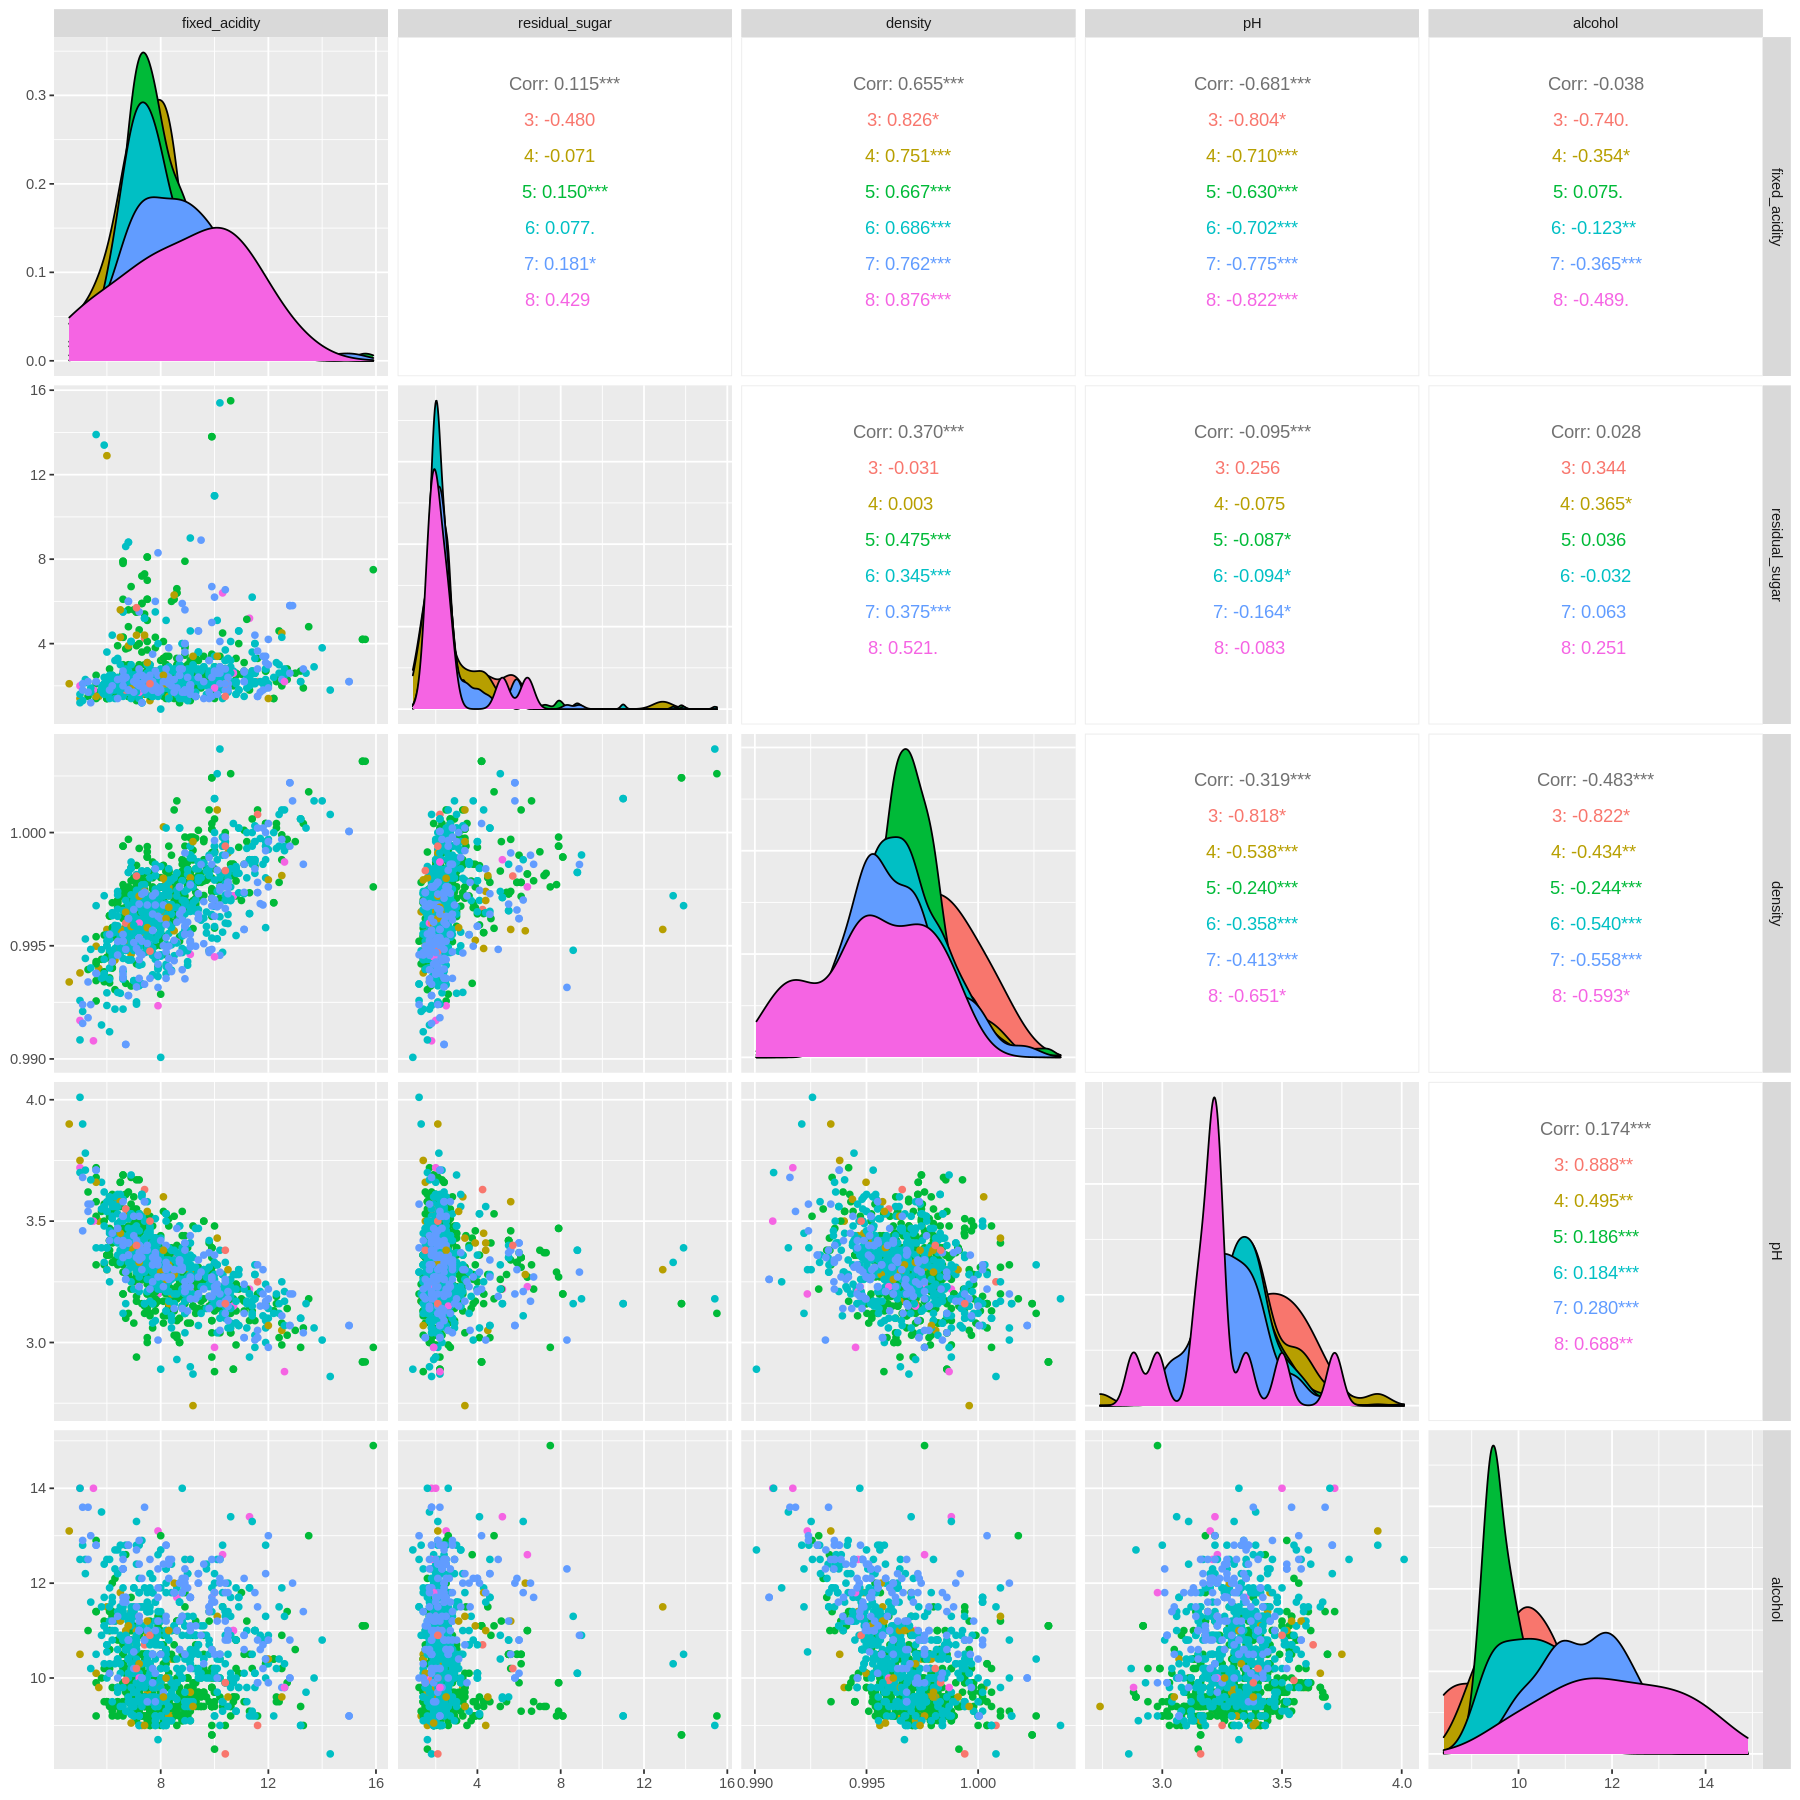

In [8]:
options(repr.plot.width = 15, repr.plot.height = 15) 
redwine_plot <- ggpairs(redwine_training_data, columns = 1:5, aes(colour=quality))

redwine_plot

The pairplot above is separated into 3 sections. 

Everything is colored to represent our factor of quality, as follows: 
* Orange: Quality = 3
* Yellow: Quality = 4
* Green: Quality = 5
* Light Blue: Quality = 6
* Dark Blue: Quality = 7
* Magenta: Quality = 8

First, the 10 plots in the bottom left show a scatterplot comparison between every combination of our 5 predictors. This is an easy way for us to visualize which combinations of predictors show correlations, all at the same time.

Second, the 10 lists of values in the top right show the Pearson correlation value for every combination of our 5 predictors. This value is a number from -1 (negative, linear) to 1 (positive, linear), representing the strength of a linear correlation, where -1 and 1 are strongest and 0 is weakest.

Finally, the 5 distributions on the middle diagonal show the correlation value for each individual predictor at each value of quality. For example, in the distribution in the very bottom right, green (quality = 5) has a very high correlation with alcohol when alcohol is around 9, and magenta's (quality = 8) highest correlation is when alcohol is around 12. This means that a prediction classifying an observation with alcohol level 9 as quality 5 would very likely be accurate. Furthermore, a prediction classifying an observation with alcohol level 12 as quality 8 would be significantly less accurate, while still being more accurate than a prediction classifying an observation with alcohol level 9 as quality 8.

**EXPECTED OUTCOMES AND SIGNIFICANCE**

* What do you expect to find?

We expect to find an accurate way to predict red wine quality (score between 0 to 10) based on the given parameters: fixed acidity, residual sugar, density, PH, and alcohol.

* What impact could such findings have?

If our process results in accurate results, our model could allow us to make predictions for new observations. This model could be useful in several wine-related industries, and will allow retailers to choose a more desirable selection of wines for consumers, along with helping producers, distributors, and businesses in the wine industry focus on producing higher quality wines. Furthermore, this will help sellers better evaluate their production, distribution, and pricing strategies, as well as giving consumers a fairer market for wine.

* What future questions could this lead to?

How could the accuracy of red wine quality evaluation be improved? 
What other characteristics of red wine greatly affect its percieved quality? Are white wines evaluated with the same indicators as red wines?
